# Data Workflow

The main workflow for any data analysis project involves the following:

* R Set-up (loading relevant packages and data)
* Data Wrangling (cleaning and preparation)
* Visualisations (tables and graphs)
* Analysis (modelling or other technical analysis)
* Assumption checking

```{note}
Advanced statistical analysis is beyond the scope of this workshop.
```

<a id="scenario"></a>
## Scenario

We are a part of a research team conducting a study that aims to understand if there is an association between the average number of hours an individual sleeps each night `[sleep_hrs_night]` and the development of hypertension
`[hypertension]` in adults aged 40 years `[age]` or older. The research team believes that the following factors could obscure such an association, and as such should be adjusted for:

* Average daily alcohol consumption `[alcohol_day]`
* Regular use of marijuana `[regular_marij]`
* Is participant currently a smoker `[smoke_now]`
* Is participant regularly physically active `[phys_active]`
* BMI Group (underweight, healthy, overweight, obese) `[bmi]`

To answer this research question, we will use the US National Health and Nutrition Examination Survey (NHANES) provided within the data file `sleep.csv.`


```{note}
The statistical methods for survey data are beyond the scope of this R workshop. As such we will treat this data as if it was collected from randomly selected individuals.
```

# R Set-up

There are a few things you need to do every time you open R:

* Install/Load packages
* Read in data (import data into R)


## Install/Load Packages



We **install** packages in R once. We **load** packages we are going to use everytime we open/start R. We recommended that you write the installation/load code at the top of your code script. This makes it easy to see what packages you used at a glance.

```{tip}
The symbol # is used to indicate a comment in R. This is a line which R will skip over and not try to run as code. The best codes are well commented.
```

In [ ]:
# Install your packages (first use only)
install.packages("tidyverse")
install.packages("janitor")
install.packages("gtsummary")
install.packages("broom.helpers")

# Load your packages (everytime you restart R)
library(tidyverse)
library(janitor)
library(gtsummary)
library(broom.helpers)

## Load in your Data



There are a variety of different ways to read data into R, since there are a variety of different ways to save and store data. One of the more common ways to save data is as a CSV (comma delimited file).

```{tip}
You will need to know which directory (folder) you're working in and point correctly to the file sleep.csv. See [Path Setting](pathsetting.md) for additional information.
```

In [16]:
# an example of path setting
#getwd()
#setwd("./sample_data")
#getwd()

# Read in your data and assign this to a dataframe called sleep
# A dataframe is the object R uses to store data sets
sleep <- read_csv("sleep.csv")

Rows: 4778 Columns: 26
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): gender, race1, education, MaritalStatus, hh income, home own, work...
dbl (12): ID, age, age (months), poverty, weight, height, pulse, bp_dia_ave,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


```{note}
Notice the message R prints out. It indicates the delimiter (,), the type of each column, and the row and column count.
```

```{tip}
R automatically saves the first row from the .csv file as column names. Ensure only the first row and first row of your data file describe the variables.
```

# Data Wrangling

## Viewing your data

It is generally **good practice** to look at your data to scan for things that might need fixing, for example:

* text in numerical cells (e.g. “six” vs 6)
* odd characters (e.g. >, <, /, etc.)
* inconsistent Date formats (e.g 01/16/2024, 16-1-24, Jan 16 2024, etc.)
* coded variables (e.g. 99 = Missing)
* typos (e.g. ys, yse)
* inconsistent capitalisation or abbreviations (e.g. Yes, Y, yes)
* misaligned/counterintuertive variable types

```{note}
Variables types include:
* numeric: doubles (dbl) - decimals, or integers (int) - whole numbers
* characters (chr) - text
* logicals (lgl) - “TRUE” or “FALSE”
* factors (fct) - categorical data stored as integers (e.g. Strongly Agree = 5)
```

```{Caution}
It is **bad practice** to look at your data to determine patterns or to determine what research questions you should ask and test.
```

There are a couple of different ways you can look at your data:


In [17]:
# glimpse provides information on each column, it's name, type and the first few entries:
glimpse(sleep)

Rows: 4,778
Columns: 26
$ ID              <dbl> 54978, 62686, 60371, 59023, 53330, 67222, 61194, 69925…
$ gender          <chr> "Female", "Female", "Female", "Female", "Male", "Femal…
$ age             <dbl> 80.15551, 80.50146, 80.82286, 80.26906, 80.69757, 80.8…
$ `age (months)`  <dbl> 961.8661, 966.0175, 969.8743, 963.2287, 968.3709, 970.…
$ race1           <chr> "Black", "White", "White", "White", "White", "White", …
$ education       <chr> "9 - 11th Grade", "High School", "Some College", "9 - …
$ MaritalStatus   <chr> "Widowed", "Widowed", "Separated", "Married", "Married…
$ `hh income`     <chr> "20000-24999", "35000-44999", NA, "15000-19999", "2000…
$ poverty         <dbl> 1.07, 2.31, NA, 1.21, 1.37, 1.15, 0.42, 1.30, 1.29, 5.…
$ `home own`      <chr> "Own", "Own", "Own", "Own", "Own", "Own", "Own", "Own"…
$ work            <chr> "NotWorking", "NotWorking", "NotWorking", "NotWorking"…
$ weight          <dbl> 120.5, 100.0, 95.9, 91.8, 113.0, 87.2, 86.5, 80.9, 81.…
$ height        

In [18]:
# head (tail) shows the first (last) n rows:
# head(sleep, n=2)
# tail(sleep, n=3)

In [ ]:
# View will open the whole dataframe
# We will comment this out here to save space
# View(sleep) # alternatively in RStudio click on sleep in the environment panel

## Data Cleaning and Preparation

### Cleaning column names

A good first step is to clean column names, in case there are any odd symbols or mixed cases. The quickest way to do this is with the clean_names function from the `janitor` package.

In [19]:
# fix column names reassigning this to the dataframe sleep
sleep <- clean_names(sleep)

# glimpse the dataframe to see the changes that have been made
glimpse(sleep)

Rows: 4,778
Columns: 26
$ id              <dbl> 54978, 62686, 60371, 59023, 53330, 67222, 61194, 69925…
$ gender          <chr> "Female", "Female", "Female", "Female", "Male", "Femal…
$ age             <dbl> 80.15551, 80.50146, 80.82286, 80.26906, 80.69757, 80.8…
$ age_months      <dbl> 961.8661, 966.0175, 969.8743, 963.2287, 968.3709, 970.…
$ race1           <chr> "Black", "White", "White", "White", "White", "White", …
$ education       <chr> "9 - 11th Grade", "High School", "Some College", "9 - …
$ marital_status  <chr> "Widowed", "Widowed", "Separated", "Married", "Married…
$ hh_income       <chr> "20000-24999", "35000-44999", NA, "15000-19999", "2000…
$ poverty         <dbl> 1.07, 2.31, NA, 1.21, 1.37, 1.15, 0.42, 1.30, 1.29, 5.…
$ home_own        <chr> "Own", "Own", "Own", "Own", "Own", "Own", "Own", "Own"…
$ work            <chr> "NotWorking", "NotWorking", "NotWorking", "NotWorking"…
$ weight          <dbl> 120.5, 100.0, 95.9, 91.8, 113.0, 87.2, 86.5, 80.9, 81.…
$ height        

### Trimming the data

It is often practical to trim your data set down to only the
necessary columns (variables). We can easily do this using the `select` function. We will keep the variables mentioned in the [Scenario](#scenario). We will also keep the gender variable `[gender]` too as there may be interesting sex-stratified differences in the data. It is also important to keep the identifier `[id]` for each data entry.

```{tip}
It is best practise to preserve the original dataframe so when we trim we assign this to a new dataframe.
```

In [20]:
# trim sleep to select columns only and assign this to a new dataframe sleep_trim
sleep_trim <- sleep %>%
  select(id,
    gender,
    age,
    hypertension,
    sleep_hrs_night,
    phys_active,
    smoke_now,
    alcohol_day,
    regular_marij,
    bmi)

# glimpse the new dataframe
glimpse(sleep_trim)

Rows: 4,778
Columns: 10
$ id              <dbl> 54978, 62686, 60371, 59023, 53330, 67222, 61194, 69925…
$ gender          <chr> "Female", "Female", "Female", "Female", "Male", "Femal…
$ age             <dbl> 80.15551, 80.50146, 80.82286, 80.26906, 80.69757, 80.8…
$ hypertension    <chr> "No Hypertension", "No Hypertension", "No Hypertension…
$ sleep_hrs_night <dbl> 7.156727, 6.199555, 9.941897, 7.892662, 5.752325, 8.55…
$ phys_active     <chr> "No", "No", "No", "No", "No", "No", "No", "No", "No", …
$ smoke_now       <chr> "No", "No", "No", "Yes", "No", "No", "No", "No", "No",…
$ alcohol_day     <chr> "3", "2", "4", "1", "1", "1", "1", "2", "1", "2", "2",…
$ regular_marij   <chr> "No", "No", "No", "No", "Yes", "Yes", "No", "Yes", "Ye…
$ bmi             <dbl> 43.41, 38.70, 38.46, 37.77, 36.15, 35.60, 35.41, 35.30…


### Filtering the data

We also want to filter the data down to our cohort of interest. In this case, we are interested in adults 40
years or older. We can use the `filter` function to remove participants who are younger than 40 from our data set, or rather only keep participants who are onlder than 40.

```{warning}
It would be a good idea check a numerical summary of the age variable to make sure there are no extreme or impossible values before we filter
```

In [21]:
# generate a summary of the age variable belonging to the sleep_trim dataframe
summary(sleep_trim$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  16.00   29.91   44.24   45.64   60.05   80.99 

This looks reasonbale and so we can proceed to filter.

In [22]:
# filter sleep_trim to select entries we want to keep assigned to a new dataframe
sleep_40 <- sleep_trim %>%
filter(age >= 40) #only those rows with age>=40

# add a check that the filter worked
cat("The minimum age of our data set is:", min(sleep_40$age), "\n")

The minimum age of our data set is: 40.00887 


```{tip}
Print statements are a valuable tool when coding (in R or otherwise). Here we make use of the `cat` function so it is clear what the R output is telling us.
```

### Variable checking

We will go through each of our variables in turn and check for required fixes.

```{tip}
As a rule of thumb:
* if we are checking a continuous variable we can use `summary` which tells you about the distribution of values for that variable.
* if we are checking a discrete or catergorical variable we can use the `table` function which tabulates counts of each response.
```

We will first consider our exposure variable, in this case, the number of hours a participant sleeps each night `[sleep_hrs_night]`. This is a continuous variable so we will check to see if the summary values look reasonable.

In [23]:
# generate a summary of sleep_hrs_night variable
summary(sleep_40$sleep_hrs_night)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.003   6.364   7.288   7.323   8.445   9.998 

```{tip}
Although the values look reasonable, 4 hours is not a lot of sleep. In practice, it might be worth checking with the data provider to make sure that there is not a typo somewhere.
```

Next we will check our outcome variable, in this case whether a participant has hypertension or not `[hypertension]`. This is a catergorical variable so we can tabulate the responses.

In [24]:
# create a table of values for hypertension
table(sleep_40$hypertension)


   Hypertension No Hypertension 
           1033            1701 

This is good there are two possible responses as we would expect.

Now let's fix the `[alcohol_day]` variable, which we saw earlier was classed a character variable. We will tabulate the variable to see what is going on.

In [25]:
# create a table of values for alcohol_day
table(sleep_40$alcohol_day)


    1    10    12    13    14    15    16    17    18     2    20    21    24 
 1007    21    40     1     1     7     1     2     1   734     3     2     1 
    3    30     4     5     6     7     8     9   one   One   six  thre three 
  355     1   212   110   133    24    33     4    13     9     2     1    10 
Three 
    6 

We can see each response (e.g 1 drink a day) is listed with the respective count (e.g. 1007 have 1 drink a day). We notice that some values were written as text. We need to replace the values written as text and reclassify the variable as numeric.

```{tip}
Since best practice is to maintain the original data we will create a new variable using the `mutate` function.
```

In [26]:
# create a numeric alcohol drink count variable called alcohol_day_num
sleep_40 <- sleep_40 %>%
mutate(alcohol_day_num = case_when(alcohol_day == "one" ~ 1, # if alcohol_day is one replace with 1
                                   alcohol_day == "One" ~ 1,
                                   alcohol_day == "three" ~ 3,
                                   alcohol_day == "Three" ~ 3,
                                   alcohol_day == "thre" ~ 3,
                                   alcohol_day == "Six" ~ 6,
                                   TRUE ~ as.numeric(alcohol_day)))

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `alcohol_day_num = case_when(...)`.
Caused by warning:
! NAs introduced by coercion”


```{warning}
R warns us that since we classified `[alcohol_day_num]` as a numeric variable any remaining text values will be replaced with missing values (NA) so we should check to see if we missed anything by tabulating this new variable.
```

A slightly tidier version of this code makes use of the `%in%` and `c()` functions

In [27]:
# create a numeric alcohol drink count variable called alcohol_day_num
sleep_40 <- sleep_40 %>%
mutate(alcohol_day_num = case_when(alcohol_day %in% c("one", "One") ~ 1, #replace one or One with 1
                                   alcohol_day %in% c("three", "Three", "thre") ~ 3,
                                   alcohol_day == "six" ~ 6,
                                   TRUE ~ as.numeric(alcohol_day)))

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `alcohol_day_num = case_when(...)`.
Caused by warning:
! NAs introduced by coercion”


In [28]:
# create a table of values for alcohol_day_num
table(sleep_40$alcohol_day_num)

# check the class of alcohol_day_num
cat("alcohol_day_num is of type:", class(sleep_40$alcohol_day_num), "\n")


   1    2    3    4    5    6    7    8    9   10   12   13   14   15   16   17 
1029  734  372  212  110  135   24   33    4   21   40    1    1    7    1    2 
  18   20   21   24   30 
   1    3    2    1    1 

alcohol_day_num is of type: numeric 


```{tip}
It would be a good idea to check the counts of `[alcohol_day_num]` correctly align with those from `[alcohol_day]`
```

Now let us check the remaining variables

In [29]:
# check marijuana indicator variable
table(sleep_40$regular_marij)


  No  Yes 
1895  839 

In [30]:
# check smoker indicator variable
table(sleep_40$smoke_now)


  No  Yes 
1555 1179 

In [31]:
# check physical activity indicator variable
table(sleep_40$phys_active)


  No  Yes 
1501 1233 

All three of these variables are binary variables with only yes and no responses (with no typos!).

```{note}
Such data could equally be stored as a logical variable where for example, `smoke_now==True` was equivalent to `smoke_now==Yes`.
```

Moving onto the `[bmi]` data. As this data is likely to take continuous rather than discrete values we would use the `summary` function rather than tabulating all values.

In [32]:
# generate a summary of bmi variable
summary(sleep_40$bmi)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.02   24.84   28.20   29.19   32.47   81.25 

This seems reasonable, but the [Scenario](#scenario) listed BMI groups (e.g. underweight, healthy, overweight, obese) rather than the BMI. Let us create a new bmi variable to aggregate participants into their BMI group.

In [33]:
# create a discrete BMI variable called bmi_group
sleep_40 <- sleep_40 %>%
mutate(bmi_group = case_when(bmi < 18.5 ~ "Underweight",
                             bmi >= 18.5 & bmi < 25 ~ "Healthy",
                             bmi >= 25 & bmi < 30 ~ "Overweight",
                             bmi >= 30 ~ "Obese",
                             TRUE ~ NA)) # any values that are not captured by the conditions are set as missing

Now that we have a discrete variable `[bmi_group]` we can check this using the `table` function and check we don't have any missing values.

In [34]:
# create a table of values for bmi_group
table(sleep_40$bmi_group)


    Healthy       Obese  Overweight Underweight 
        670        1029         999          36 

We can also check that we got our groupings correct. The following lines of code show that our minimum and maximum values all line up with the correct BMI groupings.



In [35]:
sleep_40 %>%
group_by(bmi_group) %>%
summarise(min_bmi = min(bmi),
          max_bmi = max(bmi)) %>%
            arrange(min_bmi) # arrange in ascending min_bmi order (default alphabetical)

bmi_group,min_bmi,max_bmi
<chr>,<dbl>,<dbl>
Underweight,15.02,18.44
Healthy,18.50,24.99
Overweight,25.00,29.96
Obese,30.00,81.25


# Visualisations

Now that the data is cleaned and ready to go we can start creating our data summaries and visuals.

## Tables

Let’s create a table for the research project. A table should include all the variables of interest in the study and thus, describes the sample.
We will use the `select` function to pick the variables to include in the table and the `tbl_summary` function from the `gtsummary` package to create the table.


```{tip}
It is not uncommon to miss something in the initial data cleaning, so carefully examine all the tables and graphs you make. If you do notice some data cleaning step that you missed, it’s a good idea to add the missed step to the original data cleaningcode, if possible, to keep your code organised.
```

In [ ]:
# create a table and assign it to the object table_1
table_1 <- sleep_40 %>%
  # select the variables to include
  select(gender,
         age,
         phys_active,
         smoke_now,
         alcohol_day_num,
         regular_marij,
         bmi_group,
         hypertension,
         sleep_hrs_night) %>%
           tbl_summary(missing_text = "(Missing)",
                # define clear labels for each variable
                label = list(gender ~ "Gender",
                age ~ "Age",
                phys_active ~ "Regularly Physically Activity",
                smoke_now ~ "Current Smoker",
                alcohol_day_num ~ "Alcohol Drinks per Day",
                regular_marij ~ "Regular Marijuana User",
                bmi_group ~ "BMI",
                hypertension ~ "Hypertension",
                sleep_hrs_night ~ "Sleep (hrs/night)"))

# display the table
# table_1

## Graphs

We will create a simple graph of the average number of hours a participant slept per night grouped by the participants hypertension status. We will create a box plot, where separate boxes are used for participants with and without hypertension.
Let’s start with a basic box plot of hours of sleep per night and then build out graph up bit by bit from there.
We will use the `ggplot` function and `geom_boxplot`.

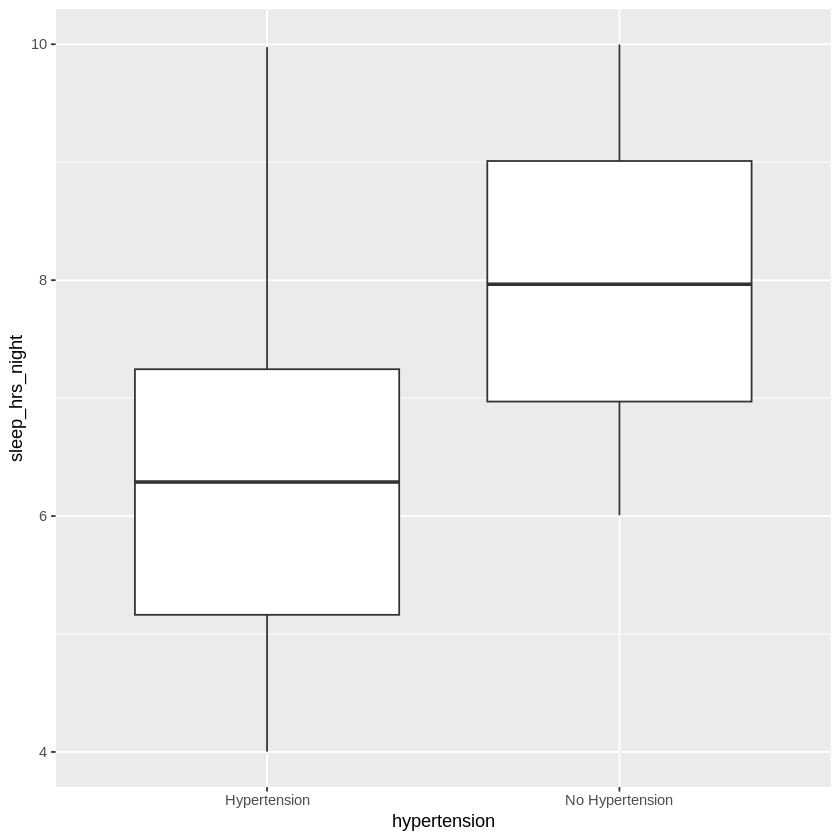

In [38]:
# a simple boxplot of all the data
sleep_40 %>%
  ggplot(aes(x = hypertension, y = sleep_hrs_night)) +
  geom_boxplot()

This is a great start but we could make the graph more aesthetically pleasing. We could:

* make the axis labels clear
* change the font size
* add colour based on hypertension status
* change the background by updating the plot theme

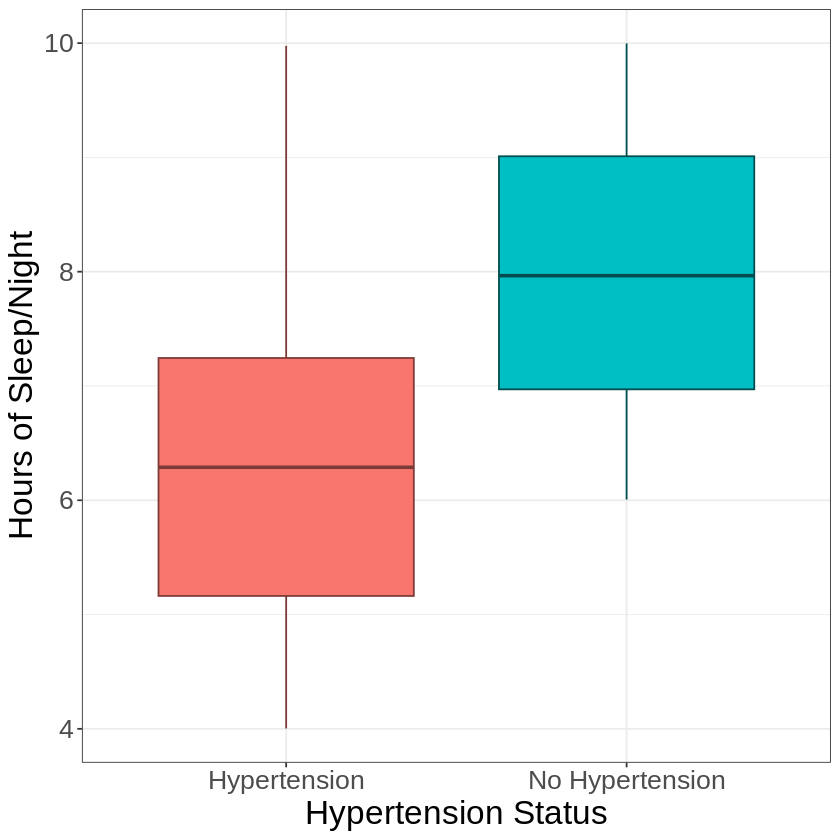

In [39]:
sleep_40 %>%
  ggplot(aes(x = hypertension, y = sleep_hrs_night, group = hypertension,
             colour = hypertension, fill = hypertension)) + # add colour
  geom_boxplot() +
  scale_colour_manual(values = c("#7c3b37", "#004c4e")) + # add defined outlines to boxes
  labs(x = "Hypertension Status", y = "Hours of Sleep/Night") + # fix labels
  guides(fill = "none", colour = "none") + # remove legend
  theme_bw() + # change background
  theme(text = element_text(size = 20)) # increase the font size